In [27]:
%pylab inline --no-import-all
from scipy.stats import chi2, norm

Populating the interactive namespace from numpy and matplotlib


In [28]:
import george
from george.kernels import ExpSquaredKernel

In [29]:
n_scan_points = 100
x = np.linspace(0,100,n_scan_points)

In [30]:
def curve(x):
    return 10*np.tanh(x/20-2)

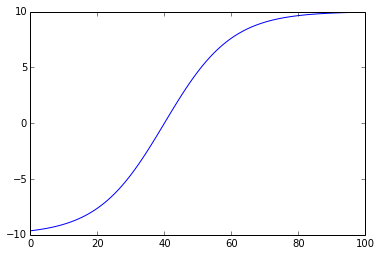

In [31]:
plt.plot(x,curve(x))

In [32]:
length_scale_of_correaltion=3.
kernel = ExpSquaredKernel(length_scale_of_correaltion, ndim=1)
gp = george.GP(kernel, solver=george.HODLRSolver) #faster

In [33]:
gp.compute(x)

In [34]:
y = gp.sample(x)+curve(x)

In [35]:
yerr = 0.95
y = curve(x) + np.random.normal(0,yerr,x.size)

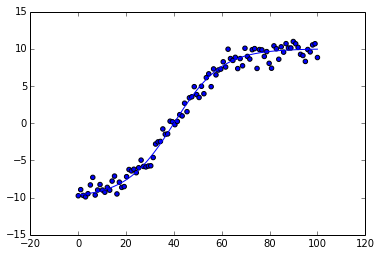

In [36]:
plt.plot(x,curve(x))
plt.scatter(x,y)

In [37]:
dy = y-np.roll(y,1)
dy[0]=0.

In [38]:
temp = curve(x)
tempdy = temp-np.roll(temp,1)
tempdy[0]=0

In [39]:
kernel_d = ExpSquaredKernel(length_scale_of_correaltion, ndim=1)
gp_d = george.GP(kernel, solver=george.HODLRSolver) #faster
gp_d.compute(x,np.sqrt(2.)*yerr)
pred_d, cov_d = gp_d.predict(dy,x)

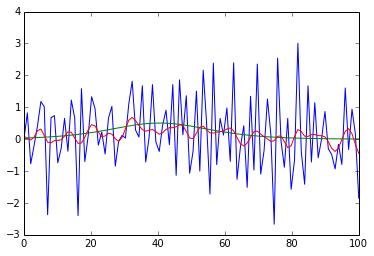

In [40]:
plt.plot(x,dy)
plt.plot(x,tempdy)
plt.plot(x,pred_d)

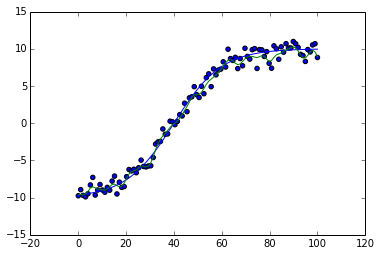

In [43]:
pred = np.cumsum(pred_d)
pred = pred*(y[-1]-y[0])/(pred[-1]-pred[0]) + y[0]

plt.plot(x,curve(x))
plt.scatter(x,y)
plt.plot(x,pred)

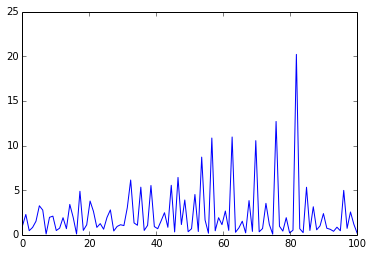

In [42]:
exp_dy = np.exp(dy)
plt.plot(x,exp_dy)

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


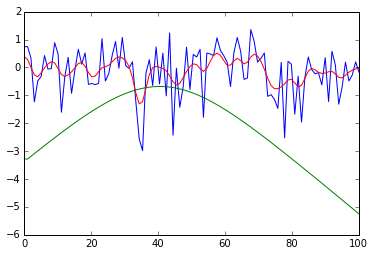

In [17]:
log_dy = np.log(np.abs(dy))
log_dy[0]=log_dy[1]

log_true_dy = np.log(np.abs(tempdy))
log_true_dy[0]=log_true_dy[1]

pred_log_dy, _ = gp_d.predict(log_dy,x)

plt.plot(x,log_dy)
plt.plot(x,log_true_dy)
plt.plot(x,pred_log_dy)

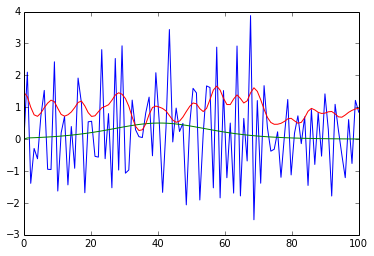

In [18]:
pred_d = np.exp(pred_log_dy)
plt.plot(x,dy)
plt.plot(x,tempdy)
plt.plot(x,pred_d)


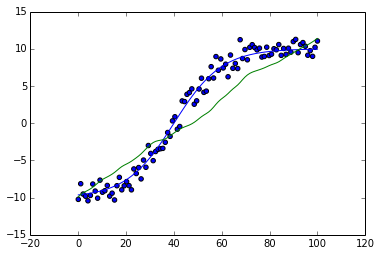

In [25]:
pred = np.cumsum(pred_d)
#now rescale and shift
#pred = (curve(x[-1])-curve(x[0]))*(pred[-1]-pred[0]) + curve(x[0])
pred = pred*(y[-1]-y[0])/(pred[-1]-pred[0]) + y[0]

plt.plot(x,curve(x))
plt.scatter(x,y)
plt.plot(x,pred)

In [22]:
y[-1]

11.048433677131468

In [24]:
pred.size

1